<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1: Load and Clean Data

In [1]:
import pandas as pd

# Load dataset
train = pd.read_csv("/content/drive/MyDrive/DataSets/twitter_training.csv", header=None, names=['id', 'entity', 'sentiment', 'text'])
val = pd.read_csv("/content/drive/MyDrive/DataSets/twitter_validation.csv", header=None, names=['id', 'entity', 'sentiment', 'text'])

# Drop missing values
train.dropna(subset=['text'], inplace=True)
val.dropna(subset=['text'], inplace=True)

# Check distribution of sentiment labels
print(train['sentiment'].value_counts())
train.head()

sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Step 2: Text Preprocessing and Cleaning

removing noise like URLs, mentions, punctuation, and stopwords, and normalizing everything to lowercase.

using :

re for regex cleaning

nltk for stopwords and tokenization

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [5]:
# Apply cleaning
train['clean_text'] = train['text'].apply(clean_text)
val['clean_text'] = val['text'].apply(clean_text)

# Show cleaned examples
train[['text', 'clean_text']].head()

,text,clean_text
0,im getting on borderlands and i will murder yo...,im get borderland murder
1,I am coming to the borders and I will kill you...,come border kill
2,im getting on borderlands and i will kill you ...,im get borderland kill
3,im coming on borderlands and i will murder you...,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,im get borderland murder


### Step 3 — Data Visualization (EDA)

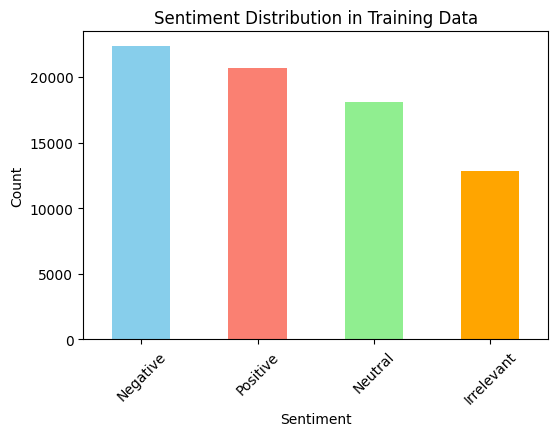

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset again (if not already loaded)
train = pd.read_csv("/content/drive/MyDrive/DataSets/twitter_training.csv", header=None, names=['id', 'entity', 'sentiment', 'text'])
train.dropna(subset=['text'], inplace=True)

#  Sentiment distribution
plt.figure(figsize=(6,4))
train['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

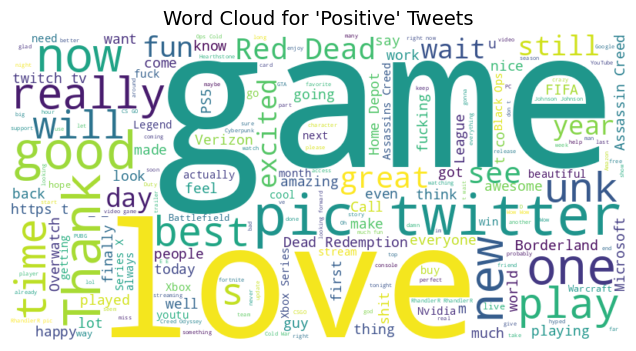

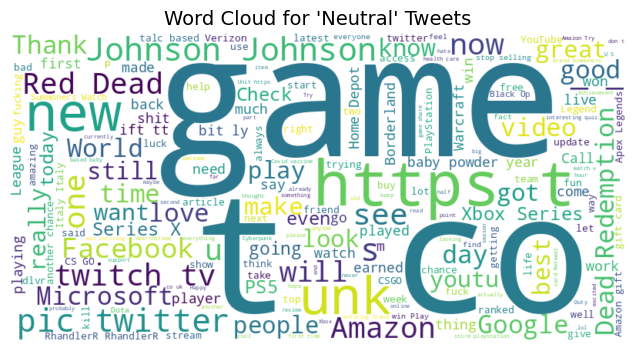

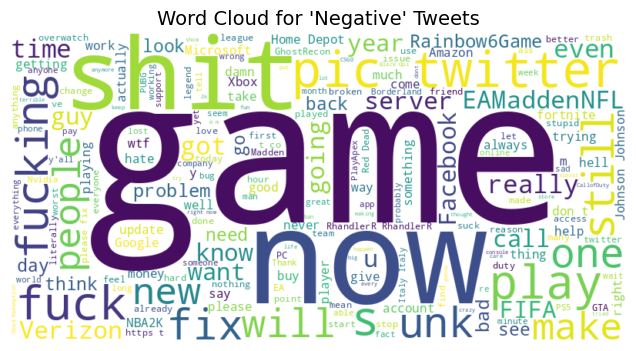

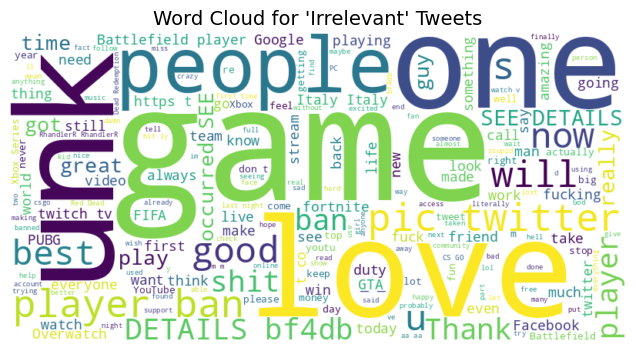

In [7]:
# Word Clouds for each sentiment
sentiments = train['sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(train[train['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{sentiment}' Tweets", fontsize=14)
    plt.show()

### Step 4 — Feature Extraction using TF-IDF

Use the cleaned text column from Step 2 (clean_text)

Applying TF-IDF Vectorizer from sklearn

Split the dataset into training and testing sets

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Reload clean_text for safety if needed
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [10]:
# Apply cleaning
train['clean_text'] = train['text'].apply(clean_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(train['clean_text'])
y = train['sentiment']

In [11]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("TF-IDF shape:", X_train.shape)

TF-IDF shape: (59196, 5000)


### Step 5 — Model Training & Evaluation

Train a few classical ML models

Compare accuracy and F1-scores

Visualize the results

testing:

Logistic Regression

Naive Bayes

Support Vector Machine (SVM)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [14]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [15]:
# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [16]:
# Evaluate all models
models = {
    "Logistic Regression": (lr_pred, lr),
    "Naive Bayes": (nb_pred, nb),
    "SVM": (svm_pred, svm)
}

In [18]:
for name, (pred, model) in models.items():
    print(f"\n {name} Results:")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))


 Logistic Regression Results:
Accuracy: 0.6754054054054054
              precision    recall  f1-score   support

  Irrelevant       0.67      0.50      0.57      2575
    Negative       0.72      0.76      0.74      4472
     Neutral       0.61      0.63      0.62      3622
    Positive       0.68      0.73      0.70      4131

    accuracy                           0.68     14800
   macro avg       0.67      0.66      0.66     14800
weighted avg       0.67      0.68      0.67     14800


 Naive Bayes Results:
Accuracy: 0.6339189189189189
              precision    recall  f1-score   support

  Irrelevant       0.73      0.35      0.47      2575
    Negative       0.62      0.80      0.70      4472
     Neutral       0.64      0.52      0.57      3622
    Positive       0.62      0.73      0.67      4131

    accuracy                           0.63     14800
   macro avg       0.65      0.60      0.60     14800
weighted avg       0.64      0.63      0.62     14800


 SVM Results:
Acc

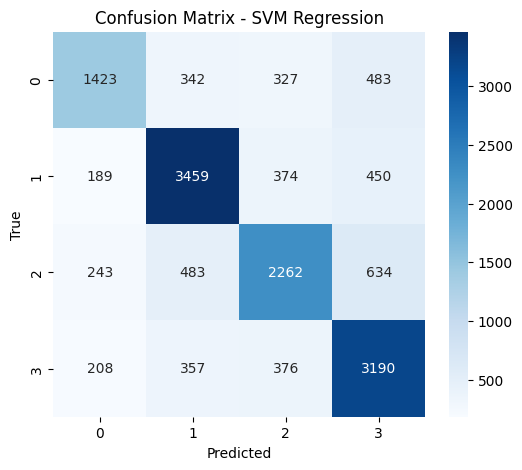

In [20]:
# Optional: visualize confusion matrix for best model
best_model = svm
best_pred = svm_pred

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Step 6 — Model Testing on Validation Data

Clean the validation text (same as training)

Transform it using the same TF-IDF vectorizer

Predict sentiment using the best model

Evaluate and inspect results

In [21]:
# Load validation dataset
val = pd.read_csv("/content/drive/MyDrive/DataSets/twitter_validation.csv", header=None, names=['id', 'entity', 'sentiment', 'text'])
val.dropna(subset=['text'], inplace=True)

# Clean validation text (reuse same cleaning function)
val['clean_text'] = val['text'].apply(clean_text)

# Transform using the same TF-IDF vectorizer
X_val = tfidf.transform(val['clean_text'])
y_val = val['sentiment']

# Predict using best model
val_pred = best_model.predict(X_val)

# Evaluate
print(" Validation Results:")
print("Accuracy:", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

 Validation Results:
Accuracy: 0.809
              precision    recall  f1-score   support

  Irrelevant       0.80      0.72      0.76       172
    Negative       0.80      0.86      0.83       266
     Neutral       0.85      0.75      0.80       285
    Positive       0.79      0.87      0.83       277

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



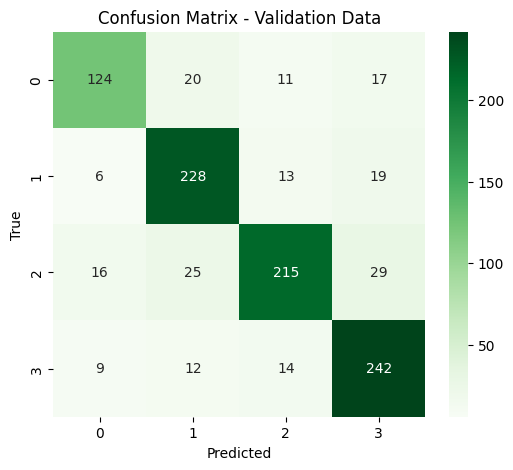

,text,sentiment,predicted
0,I mentioned on Facebook that I was struggling ...,Irrelevant,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative,Negative
4,Now the President is slapping Americans in the...,Neutral,Neutral
5,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Negative,Negative
6,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,Positive,Positive
7,"Rocket League, Sea of Thieves or Rainbow Six: ...",Positive,Positive
8,my ass still knee-deep in Assassins Creed Odys...,Positive,Positive
9,FIX IT JESUS ! Please FIX IT ! What In the wor...,Negative,Negative


In [22]:
# Confusion matrix for validation data
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, val_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Check some example predictions
val_results = val[['text', 'sentiment']].copy()
val_results['predicted'] = val_pred
val_results.head(10)

### Step 7 — Model Saving & Inference Pipeline

Save the TF-IDF vectorizer and the trained model

Load them later without retraining

Predict sentiment for any new tweet

In [23]:
import joblib

# Save TF-IDF vectorizer and model
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(best_model, "sentiment_model.pkl")

print(" Model and vectorizer saved successfully!")

 Model and vectorizer saved successfully!


In [26]:
import joblib

# Load the TF-IDF vectorizer and the trained model
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")
loaded_model = joblib.load("sentiment_model.pkl")

# Function to predict sentiment for new tweets
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = loaded_vectorizer.transform([cleaned])
    prediction = loaded_model.predict(vectorized)[0]
    return prediction

# Example predictions
sample_texts = [
    "I love this new update! Everything looks awesome 😍",
    "This app keeps crashing. I’m so annoyed!",
    "It’s okay, nothing special honestly."
]

for t in sample_texts:
    print(f"Tweet: {t}")
    print(f"Predicted Sentiment: {predict_sentiment(t)}\n")

Tweet: I love this new update! Everything looks awesome 😍
Predicted Sentiment: Positive

Tweet: This app keeps crashing. I’m so annoyed!
Predicted Sentiment: Negative

Tweet: It’s okay, nothing special honestly.
Predicted Sentiment: Positive

